In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


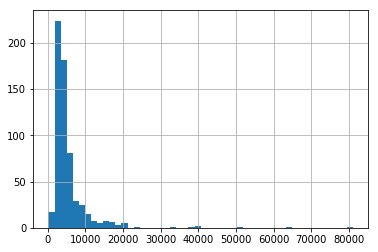

In [5]:
df['ApplicantIncome'].hist(bins=50)

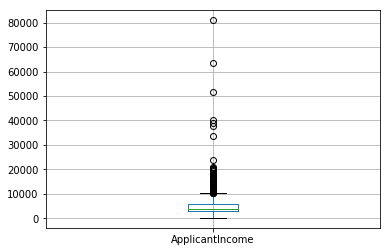

In [6]:
df.boxplot(column='ApplicantIncome') # there are some outliers clearly

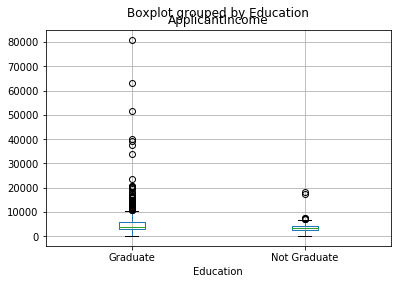

In [7]:
df.boxplot(column='ApplicantIncome', by = 'Education') # graduates are dominating and generating some outliers

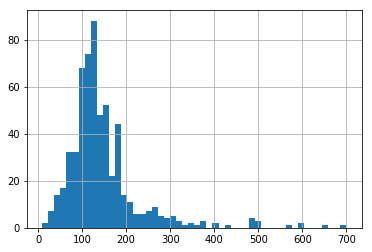

In [8]:
df['LoanAmount'].hist(bins=50)

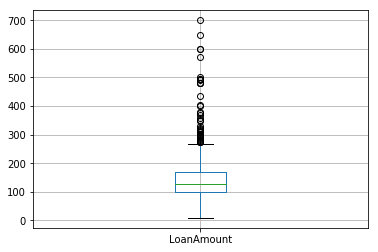

In [9]:
df.boxplot(column='LoanAmount') # there are some outliers in this variable too

In [10]:
df.count() # print the count for non-nan values for each column

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

### Lets Impute NA values

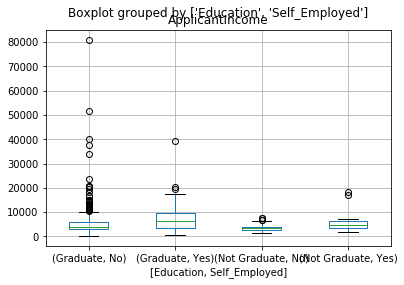

In [81]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

df.boxplot(column='ApplicantIncome', by = ['Education', 'Self_Employed']) # graduates are dominating and generating some outliers

In [82]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [83]:
df['Self_Employed'].fillna('No',inplace=True)

In [84]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [85]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [86]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median) 
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [87]:
# Define function to return value of this pivot_table 
def fage(x): 
    return table.loc[x['Self_Employed'],x['Education']] 
# Replace missing values 
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [88]:
df.count()['LoanAmount']

614

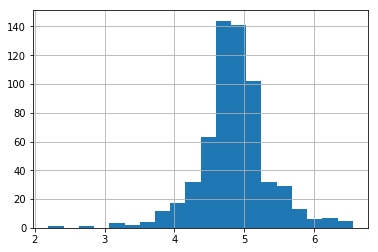

In [89]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20)

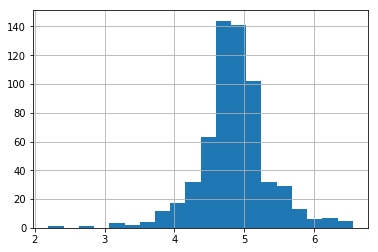

In [90]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'] 
df['TotalIncome_log'] = np.log(df['TotalIncome']) 
df['LoanAmount_log'].hist(bins=20)

In [91]:
import seaborn as sns

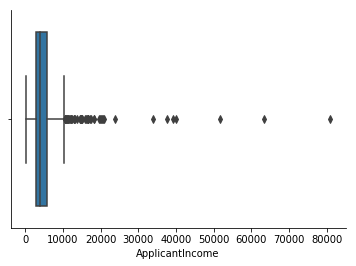

In [92]:
sns.boxplot(df['ApplicantIncome'])
sns.despine()

In [93]:
test = df.groupby(['Gender'])
test.describe()

ApplicantIncome                                                   \
                 count         mean          std    min     25%     50%   
Gender                                                                    
Female           112.0  4643.473214  3585.381488  210.0  2661.5  3583.0   
Male             489.0  5446.460123  6185.789262  150.0  2917.0  3865.0   

                        CoapplicantIncome               ... TotalIncome  \
           75%      max             count         mean  ...         75%   
Gender                                                  ...               
Female  4606.5  19484.0             112.0  1108.008929  ...     6171.25   
Male    5923.0  81000.0             489.0  1742.932352  ...     7740.00   

                TotalIncome_log                                          \
            max           count      mean       std       min       25%   
Gender                                                                    
Female  42083.0           112.0  8.476517  0.539895  7.512071  8.136225   
Male    81000.0           489.0  8.704364  0.527946  7.273786  8.390041   

                                       
             50%       75%        max  
Gender                                 
Female  8.365439  8.727641  10.647399  
Male    8.642239  8.954157  11.302204  

[2 rows x 64 columns]

## Lets fill all the missing values

In [94]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
LoanAmount_log       614
TotalIncome          614
TotalIncome_log      614
dtype: int64

In [95]:
df['Gender'].fillna('Male', inplace=True)

In [96]:
df.groupby(['Married']).count()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
Married,,,,,,,,,,,,,,,
No,213,213,209,213,213,213,213,213,208,199,213,213,213,213,213
Yes,398,398,390,398,398,398,398,398,389,362,398,398,398,398,398


In [97]:
df['Dependents'].fillna(value = 0, inplace=True)
df['Married'].fillna(value = 'No', inplace=True)
df['Loan_Amount_Term'].fillna(value = np.mean(df['Loan_Amount_Term']), inplace=True)
df['Credit_History'].fillna(value = 0, inplace=True)

## Let's impute our dataset and split it into train set and test set

In [145]:
features = ['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'TotalIncome']
y = df['Loan_Status']
X = df[features]
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [147]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)['Y']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Y, dtype: uint8

In [148]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
test_y.head()

350    1
377    1
163    1
609    1
132    1
Name: Y, dtype: uint8

# Now let's apply some model on our data using sklearn

## First apply logistic regression

In [155]:
#Import Library
from sklearn.linear_model import LogisticRegression
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset # Create logistic regression object
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Train the model using the training sets and check score
clf.fit(train_X, train_y)

c:\program files\python35\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [156]:
#Equation coefficient and Intercept
print('Coefficient: \n', clf.coef_)
print('Intercept: \n', clf.intercept_)

Coefficient: 
 [[-4.96734539e-06  8.54166418e-04  8.75858495e-01 -8.25795015e-06
  -1.35127087e-01 -4.52938434e-02 -1.68454629e-01  1.29352521e-01
   1.37017724e-01 -1.97570433e-02 -6.27482704e-02 -9.91176777e-02
   1.66123640e-02 -2.01628637e-01  2.44849975e-01 -1.25726651e-01]]
Intercept: 
 [-0.08035047]


In [157]:
# Lets make predictions on our test data
preds = clf.predict(test_X)

In [159]:
test_y.shape

(203,)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test_y)

0.7241379310344828